# Importing Libraries and Data

In [2]:
#import libraries in order to import data
import pandas as pd 
import numpy as np

In [3]:
#import data 
loan_df = pd.read_csv('./Data/Loan_Approval.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#describe the column info 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see there are total 13 columns including target variable, all of them are self explanatory.

We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns

In [6]:
#Dropping unneccessary columns
updated_loan_df = loan_df.drop(columns=['Loan_ID'])

# Exploratory Data Analysis (EDA)

In [7]:
#import the neccessary libraries 
import seaborn as sns
import matplotlib.pyplot as plt

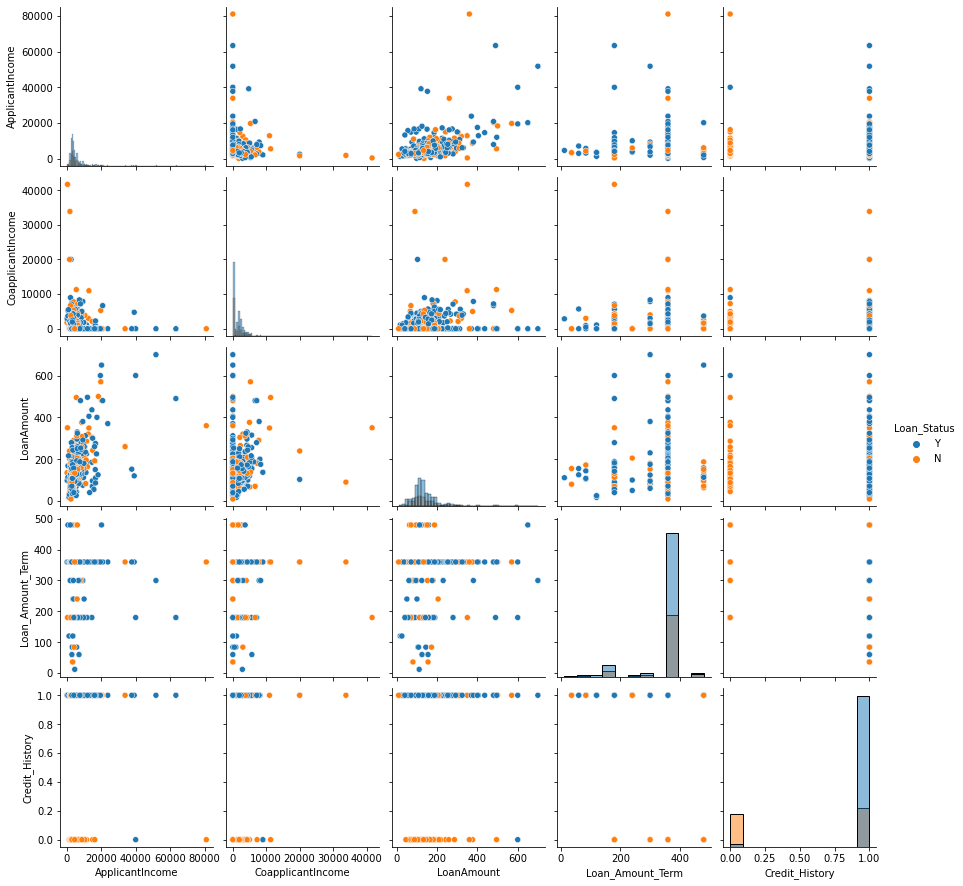

In [8]:
sns.pairplot(updated_loan_df, diag_kind = 'hist', hue = 'Loan_Status')

Some observations that I have noticed:

1. The higher the Applicant Income, the higher the the loan amount they request
2. The higher the Coapplicant Income, the higher the the loan amount they request

Although we plotted the pairplot, we need to go into more in depth of this dataframe:

##### Visualizing Categorical Columns

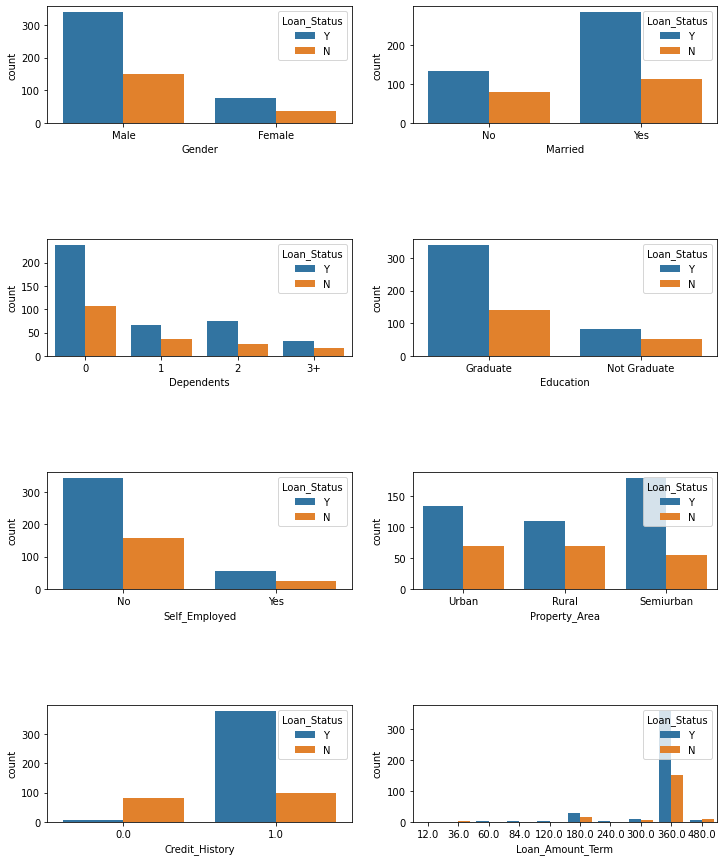

In [9]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=updated_loan_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men than Women 
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

##### Visualizing Numerical Columns

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


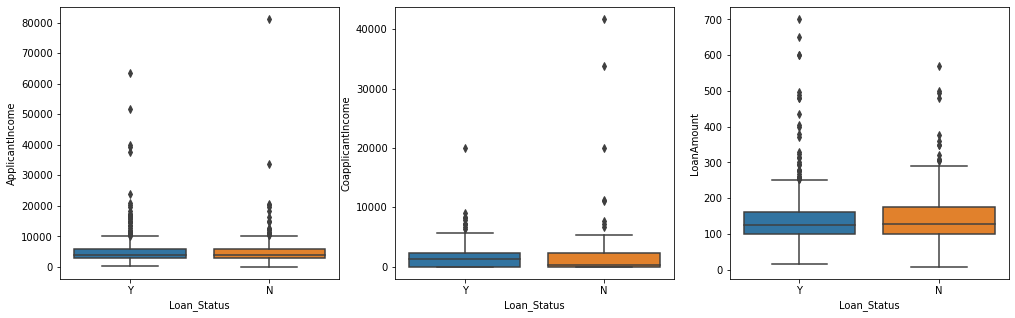

In [10]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=updated_loan_df,x='Loan_Status',ax=axes[idx])

print(updated_loan_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

It seems that there is no correlation between numerical columns and Loan approval status.

# Cleaning Data and encoding features 

In order to insert the dataset into different statistical models, we need to clean the dataset and encode the categorical features in order to work with categorical features.

In [11]:
#drop all unneccessary na entries
updated_loan_df = updated_loan_df.dropna()
updated_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [12]:
#encoding categorical columns
loan_df_encoded = pd.get_dummies(updated_loan_df,drop_first=True)
loan_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [13]:
#Split dataset in order to predict Target Variable#
X = loan_df_encoded.drop(columns='Loan_Status_Y')
y = loan_df_encoded['Loan_Status_Y']


In [14]:
#Spliting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,stratify =y,random_state =42)

# Scale X test data


In [18]:
#import different models
from sklearn.model_selection import cross_val_score
#RandomForest
from sklearn.ensemble import RandomForestClassifier
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test) 

In [19]:
model = DecisionTreeClassifier()
model.fit(scaled_x_train, y_train)
predictions = model.predict(scaled_x_test)
accuracy_score(y_test, predictions)

0.7682291666666666

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       118
           1       0.81      0.86      0.84       266

    accuracy                           0.77       384
   macro avg       0.73      0.71      0.72       384
weighted avg       0.76      0.77      0.76       384



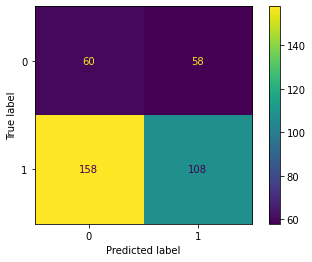

In [21]:
plot_confusion_matrix(model,X_test,y_test)

# Cross validation with Cross_val_score

In [61]:
depth = []
for i in range(3,20):
    clf = DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.6954474097331241), (4, 0.7080062794348508), (5, 0.718210361067504), (6, 0.7087912087912088), (7, 0.6875981161695447), (8, 0.7401883830455258), (9, 0.7598116169544741), (10, 0.7503924646781791), (11, 0.7197802197802198), (12, 0.739403453689168), (13, 0.749607535321821), (14, 0.7291993720565149), (15, 0.7401883830455258), (16, 0.7064364207221351), (17, 0.749607535321821), (18, 0.739403453689168), (19, 0.7598116169544741)]


It looks like max depth of 3 is the best parameter for the decision tree the based on cross_val_score

# Cross validation using cross_validate

In [62]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
#creating scoring list 
scoring = ['precision_macro', 'recall_macro']
#create the model 
clf = LogisticRegression(solver= 'liblinear', multi_class= 'auto')
#get the scores 
scores = cross_validate(clf,X_train, y_train, scoring = scoring)
sorted(scores.keys())

C:\Users\alecp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [63]:
#call test recall macro
scores['test_recall_macro']

array([0.5952381 , 0.54487179, 0.91666667, 0.5       , 0.71153846])

# Model Selection 

In [64]:
#Dictionary that includes all models and parameters
model_params ={
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C':[1,5]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    }
    
}

In [65]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#Create an empty list to save the scores
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5,return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [66]:
df

,model,best_score,best_params
0,random_forest,0.761579,{'n_estimators': 5}
1,logistic_regression,0.761053,{'C': 1}
2,decision_tree,0.666842,{'criterion': 'entropy'}


It looks like logistic regression is the best option for this table!